### Import Library

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import joblib

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

### Load Data

In [23]:
df = joblib.load('../data/processed/ori_new.pkl')

In [24]:
df

,Temperature,Humidity,TVOC,eCO2,Raw_H2,Raw_Ethanol,Pressure,PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire_Alarm
0,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0
1,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,0
2,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,0
3,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,0
4,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,0
62626,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,0
62627,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,0
62628,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,0


### Data Splitting

In [25]:
target = 'Fire_Alarm'
x = df.drop(target, axis=1).copy()
y = df[target].copy()

In [26]:
x

,Temperature,Humidity,TVOC,eCO2,Raw_H2,Raw_Ethanol,Pressure,PM1.0,PM2.5,NC0.5,NC1.0,NC2.5
0,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000
1,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000
2,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000
3,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000
4,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...
62625,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015
62626,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015
62627,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014
62628,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014


In [27]:
y

0        0
1        0
2        0
3        0
4        0
        ..
62625    0
62626    0
62627    0
62628    0
62629    0
Name: Fire_Alarm, Length: 62630, dtype: int64

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42, stratify = y)
x_valid, x_test, y_valid, y_test = train_test_split(x_test, y_test, test_size = 0.5, random_state = 42, stratify = y_test)

In [29]:
joblib.dump(x_train, '../data/processed/x_train.pkl')
joblib.dump(y_train, '../data/processed/y_train.pkl')
joblib.dump(x_valid, '../data/processed/x_valid.pkl')
joblib.dump(y_valid, '../data/processed/y_valid.pkl')
joblib.dump(x_test, '../data/processed/x_test.pkl')
joblib.dump(y_test, '../data/processed/y_test.pkl')

['../data/processed/y_test.pkl']

In [30]:
# combine x dan y pada data train, agar lebih simple
train_set = pd.concat([x_train, y_train], axis = 1)

### Checking Null Value

In [31]:
train_set.isnull().sum().sort_values(ascending=True)

Temperature    0
Humidity       0
TVOC           0
eCO2           0
Raw_H2         0
Raw_Ethanol    0
Pressure       0
PM1.0          0
PM2.5          0
NC0.5          0
NC1.0          0
NC2.5          0
Fire_Alarm     0
dtype: int64

### Data Exploration

In [32]:
train_set.head()

,Temperature,Humidity,TVOC,eCO2,Raw_H2,Raw_Ethanol,Pressure,PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire_Alarm
43502,27.120,47.37,1228,405,12909,19428,938.728,1.66,1.73,11.46,1.787,0.040,1
16652,13.211,47.92,1264,424,12869,19410,938.763,2.24,2.33,15.44,2.408,0.054,1
53451,28.170,43.68,125,400,12793,20595,937.321,1.85,1.93,12.76,1.991,0.045,0
28269,20.540,58.07,202,400,13188,20014,939.689,2.25,2.34,15.48,2.414,0.055,1
11367,10.413,47.82,1073,629,12797,19449,939.098,2.07,2.15,14.27,2.226,0.050,1


#### Check Correlation

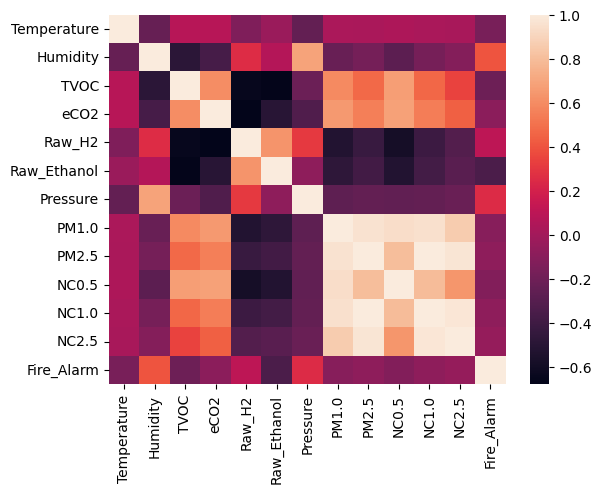

In [33]:
sns.heatmap(train_set.corr(numeric_only = True))
plt.show()

In [34]:
train_set.corr()

,Temperature,Humidity,TVOC,eCO2,Raw_H2,Raw_Ethanol,Pressure,PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire_Alarm
Temperature,1.000000,-0.238081,0.080934,0.078505,-0.140333,-0.035417,-0.249255,0.032693,0.026579,0.036309,0.026064,0.019740,-0.163384
Humidity,-0.238081,1.000000,-0.485137,-0.370216,0.252846,0.066486,0.690161,-0.233247,-0.175432,-0.275708,-0.170806,-0.115710,0.397123
TVOC,0.080934,-0.485137,1.000000,0.601624,-0.652902,-0.672761,-0.217595,0.593089,0.474083,0.668171,0.464200,0.343804,-0.211046
eCO2,0.078505,-0.370216,0.601624,1.000000,-0.679608,-0.501463,-0.327683,0.645757,0.552871,0.684418,0.544574,0.439299,-0.094535
Raw_H2,-0.140333,0.252846,-0.652902,-0.679608,1.000000,0.628097,0.308569,-0.522954,-0.424456,-0.581601,-0.416174,-0.314542,0.106201
Raw_Ethanol,-0.035417,0.066486,-0.672761,-0.501463,0.628097,1.000000,-0.077239,-0.474496,-0.387926,-0.524418,-0.380599,-0.290356,-0.346068
Pressure,-0.249255,0.690161,-0.217595,-0.327683,0.308569,-0.077239,1.000000,-0.267641,-0.252741,-0.255951,-0.250886,-0.223856,0.247576
PM1.0,0.032693,-0.233247,0.593089,0.645757,-0.522954,-0.474496,-0.267641,1.000000,0.957490,0.940865,0.951442,0.859710,-0.107519
PM2.5,0.026579,-0.175432,0.474083,0.552871,-0.424456,-0.387926,-0.252741,0.957490,1.000000,0.803143,0.999794,0.970507,-0.082193
NC0.5,0.036309,-0.275708,0.668171,0.684418,-0.581601,-0.524418,-0.255951,0.940865,0.803143,1.000000,0.790893,0.635828,-0.125538


### Outlier

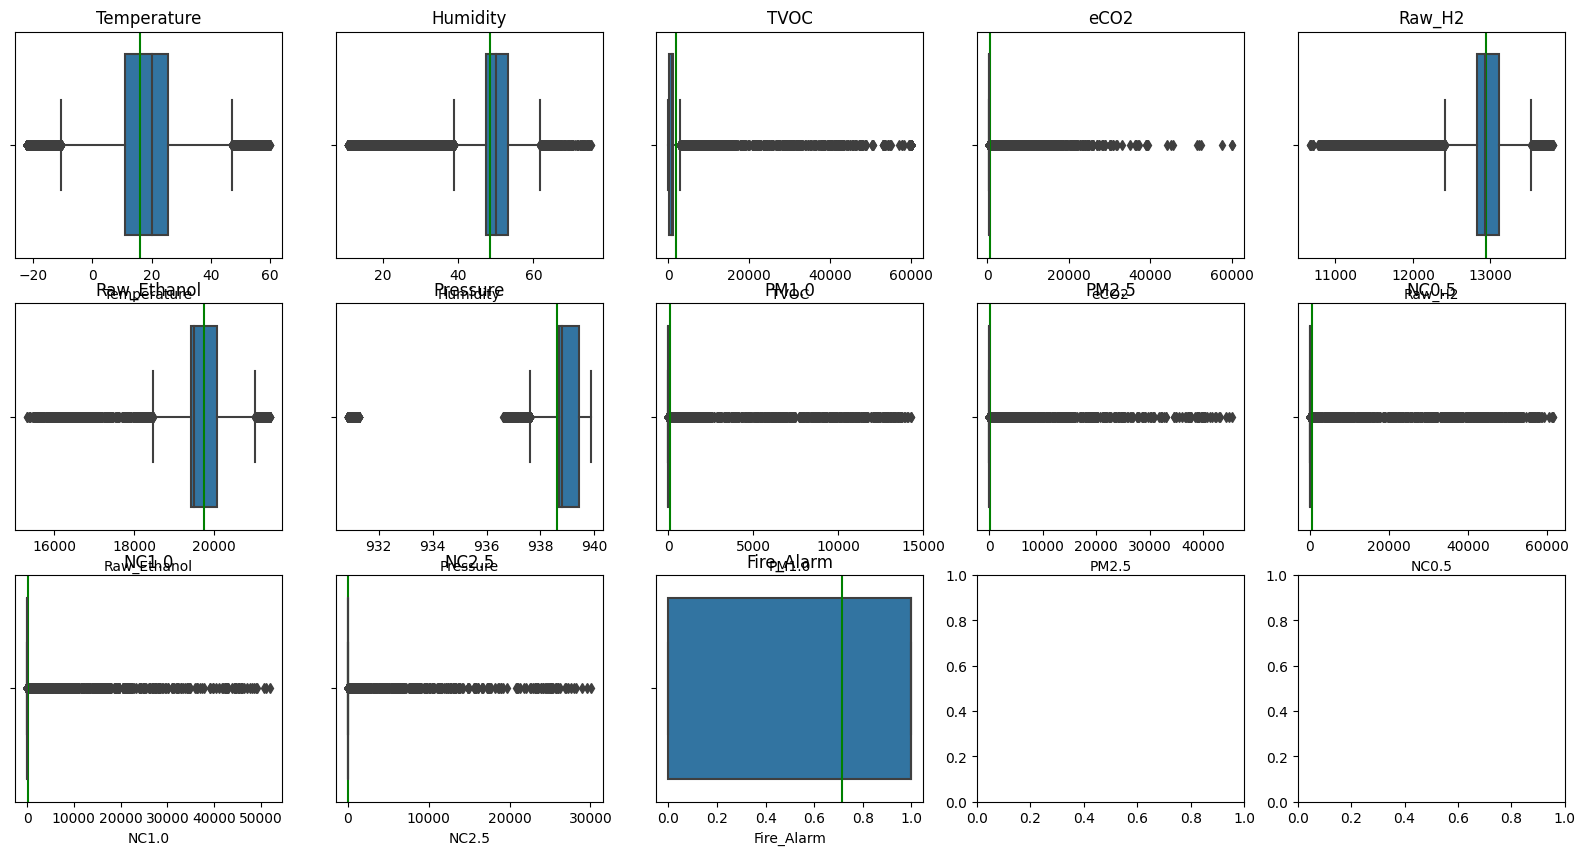

In [37]:
# Checking boxplot
fig, ax = plt.subplots(nrows=3, ncols=5, figsize=(20,10))
for j,i in enumerate(train_set.columns):
    sns.boxplot(data=train_set, x=i, ax=ax[j//5,j%5], hue=target)
    ax[j//5, j%5].axvline(train_set[i].mean(), 0, 1, color = 'g')
    ax[j//5, j%5].set_title(i)
plt.show()

> dari kedua boxplot, terlihat bahwa banyak outlier.

In [40]:
train_set.columns

Index(['Temperature', 'Humidity', 'TVOC', 'eCO2', 'Raw_H2', 'Raw_Ethanol',
       'Pressure', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0', 'NC2.5', 'Fire_Alarm'],
      dtype='object')

In [43]:
train_set_clean=pd.DataFrame()
for i in train_set.columns:
    q1 = train_set[i].quantile(0.25)
    q3 = train_set[i].quantile(0.75)
    iqr = q3-q1
    a = q1-(1.5*iqr)
    b = q3+(1.5*iqr)
    r = train_set[(train_set[i]>=a) & (train_set[i]<=b)]
    train_set_clean = pd.concat([train_set_clean,r])
duplicated_index = train_set_clean.index.value_counts()
used_index = duplicated_index[duplicated_index==13].index
train_set_clean = train_set_clean.loc[used_index].drop_duplicates()
train_set_clean

,Temperature,Humidity,TVOC,eCO2,Raw_H2,Raw_Ethanol,Pressure,PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire_Alarm
43502,27.120,47.37,1228,405,12909,19428,938.728,1.66,1.73,11.46,1.787,0.040,1
26133,15.890,54.62,0,400,13074,19971,939.747,0.32,0.33,2.20,0.343,0.008,0
5137,-8.792,51.42,50,400,13232,20165,939.684,2.18,2.26,15.00,2.340,0.053,1
33067,18.600,54.98,316,400,13107,19948,939.387,0.36,0.37,2.48,0.387,0.009,1
3790,1.903,48.94,156,400,13214,20069,939.655,1.61,1.68,11.11,1.732,0.039,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5671,-9.190,49.29,61,400,13236,20190,939.738,2.37,2.46,16.31,2.543,0.057,1
19541,19.709,52.50,1260,406,12917,19417,938.688,1.64,1.70,11.29,1.761,0.040,1
5579,-9.258,55.54,39,400,13244,20212,939.732,2.57,2.67,17.71,2.761,0.062,1
31715,20.470,54.91,193,400,13158,20074,939.593,0.66,0.68,4.53,0.707,0.016,1


#### Checking Imbalance & Treatment SMOTE

In [44]:
train_set_clean[target].value_counts()

1    21506
0     3376
Name: Fire_Alarm, dtype: int64

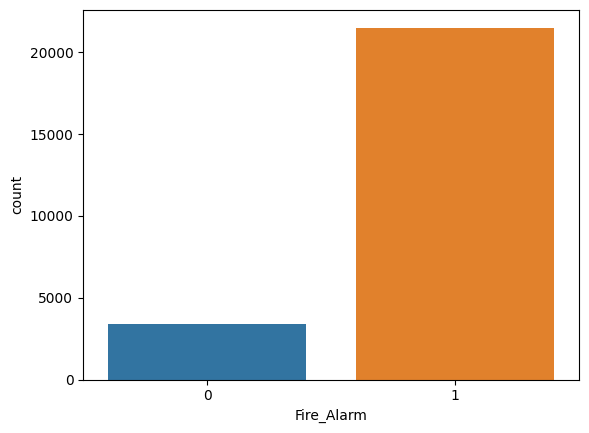

In [45]:
sns.countplot(data=train_set_clean, x=target)
plt.show()

> data target terlihat imbalance --> lakukan treatment imbalance data SMOTE

>Random oversampling just increases the size of the training data set through repetition of the original examples. It does not cause any >increase in the variety of training examples.

>Oversampling using SMOTE not only increases the size of the training data set, it also increases the variety.

>SMOTE creates new (artificial) training examples based on the original training examples. For instance, if it sees two examples (of the same >class) near each other, it creates a third artificial one, bang in the middle of the original two.

In [46]:
sm = SMOTE(random_state = 112)
x_sm, y_sm = sm.fit_resample(train_set_clean.drop(target, axis = 1), train_set_clean[target])
train_set_clean_sm = pd.concat([x_sm, y_sm], axis = 1)

In [47]:
train_set_clean_sm[target].value_counts()

1    21506
0    21506
Name: Fire_Alarm, dtype: int64

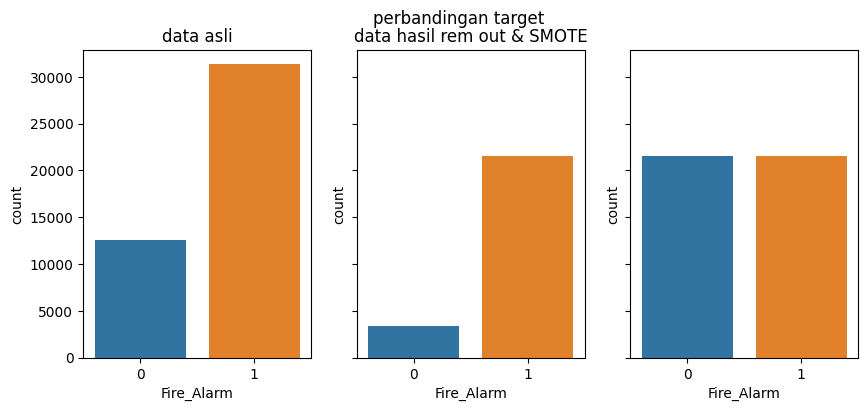

In [49]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10,4), sharey=True)
fig.suptitle('perbandingan target')
ax[0].set_title('data asli')
ax[1].set_title('data hasil rem out')
ax[1].set_title('data hasil rem out & SMOTE')

sns.countplot(data=train_set, x=target, ax=ax[0])
sns.countplot(data=train_set_clean, x=target, ax=ax[1])
sns.countplot(data=train_set_clean_sm, x=target, ax=ax[2])
plt.show()

In [50]:
train_set_clean_sm[target].value_counts()

1    21506
0    21506
Name: Fire_Alarm, dtype: int64

### Distribution

In [51]:
train_set_clean_sm.columns

Index(['Temperature', 'Humidity', 'TVOC', 'eCO2', 'Raw_H2', 'Raw_Ethanol',
       'Pressure', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0', 'NC2.5', 'Fire_Alarm'],
      dtype='object')

#### Temperature

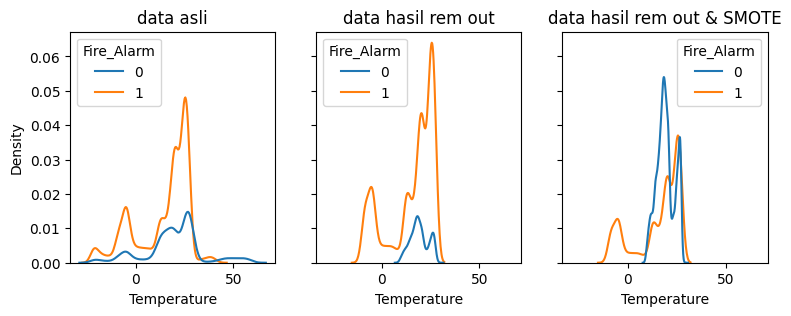

In [52]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(9,3), sharey=True, sharex=True)
ax[0].set_title('data asli')
ax[1].set_title('data hasil rem out')
ax[2].set_title('data hasil rem out & SMOTE')

sns.kdeplot(data=train_set, x='Temperature', hue='Fire_Alarm', ax=ax[0])
sns.kdeplot(data=train_set_clean, x='Temperature', hue='Fire_Alarm', ax=ax[1])
sns.kdeplot(data=train_set_clean_sm, x='Temperature', hue='Fire_Alarm', ax=ax[2])
plt.show()

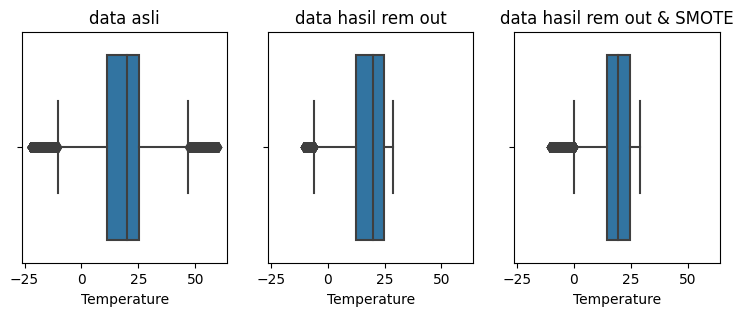

In [53]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(9,3), sharey=True, sharex=True)
ax[0].set_title('data asli')
ax[1].set_title('data hasil rem out')
ax[2].set_title('data hasil rem out & SMOTE')

sns.boxplot(data=train_set, x='Temperature', ax=ax[0])
sns.boxplot(data=train_set_clean, x='Temperature', ax=ax[1])
sns.boxplot(data=train_set_clean_sm, x='Temperature', ax=ax[2])
plt.show()

#### Humidity

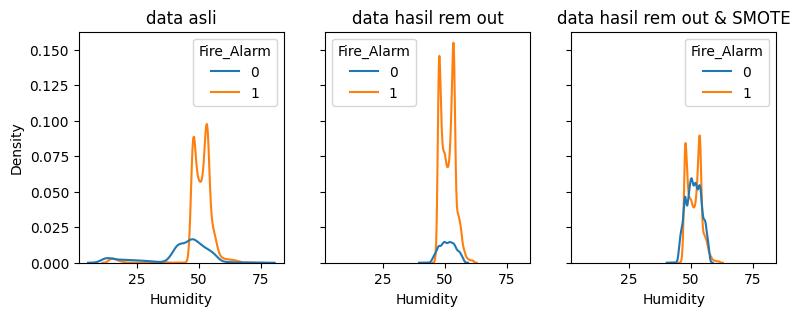

In [54]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(9,3), sharey=True, sharex=True)
ax[0].set_title('data asli')
ax[1].set_title('data hasil rem out')
ax[2].set_title('data hasil rem out & SMOTE')

sns.kdeplot(data=train_set, x='Humidity', hue='Fire_Alarm', ax=ax[0])
sns.kdeplot(data=train_set_clean, x='Humidity', hue='Fire_Alarm', ax=ax[1])
sns.kdeplot(data=train_set_clean_sm, x='Humidity', hue='Fire_Alarm', ax=ax[2])
plt.show()

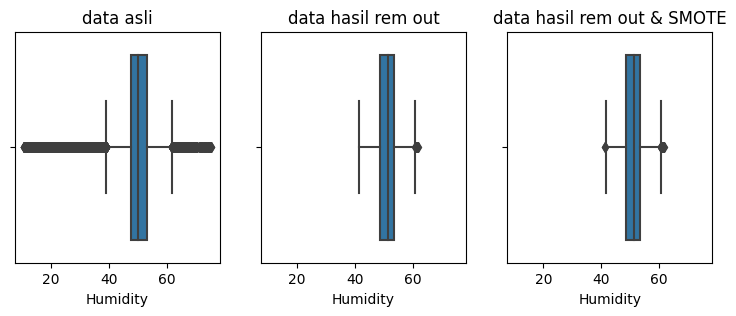

In [55]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(9,3), sharey=True, sharex=True)
ax[0].set_title('data asli')
ax[1].set_title('data hasil rem out')
ax[2].set_title('data hasil rem out & SMOTE')

sns.boxplot(data=train_set, x='Humidity', ax=ax[0])
sns.boxplot(data=train_set_clean, x='Humidity', ax=ax[1])
sns.boxplot(data=train_set_clean_sm, x='Humidity', ax=ax[2])
plt.show()

#### TVOC

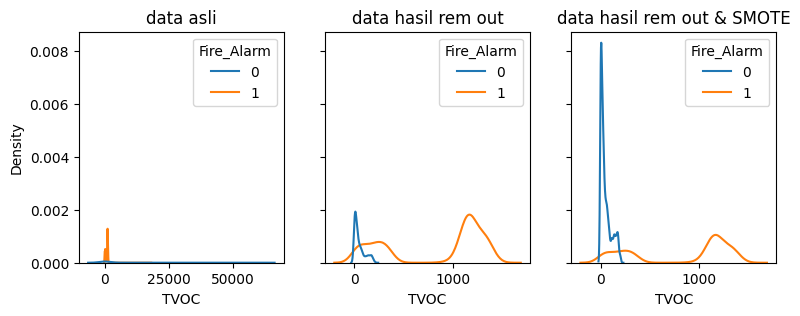

In [56]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(9,3), sharey=True)
ax[0].set_title('data asli')
ax[1].set_title('data hasil rem out')
ax[2].set_title('data hasil rem out & SMOTE')

sns.kdeplot(data=train_set, x='TVOC', hue='Fire_Alarm', ax=ax[0])
sns.kdeplot(data=train_set_clean, x='TVOC', hue='Fire_Alarm', ax=ax[1])
sns.kdeplot(data=train_set_clean_sm, x='TVOC', hue='Fire_Alarm', ax=ax[2])
plt.show()

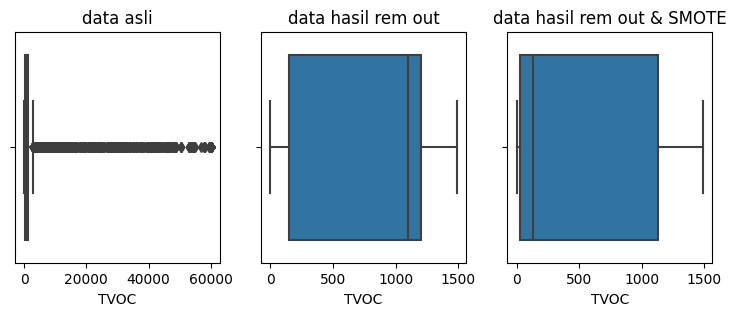

In [57]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(9,3), sharey=True)
ax[0].set_title('data asli')
ax[1].set_title('data hasil rem out')
ax[2].set_title('data hasil rem out & SMOTE')

sns.boxplot(data=train_set, x='TVOC', ax=ax[0])
sns.boxplot(data=train_set_clean, x='TVOC', ax=ax[1])
sns.boxplot(data=train_set_clean_sm, x='TVOC', ax=ax[2])
plt.show()

#### eCO2

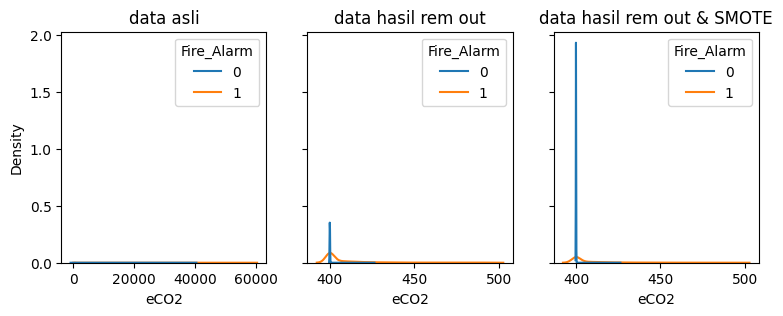

In [58]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(9,3), sharey=True)
ax[0].set_title('data asli')
ax[1].set_title('data hasil rem out')
ax[2].set_title('data hasil rem out & SMOTE')

sns.kdeplot(data=train_set, x='eCO2', hue='Fire_Alarm', ax=ax[0])
sns.kdeplot(data=train_set_clean, x='eCO2', hue='Fire_Alarm', ax=ax[1])
sns.kdeplot(data=train_set_clean_sm, x='eCO2', hue='Fire_Alarm', ax=ax[2])
plt.show()

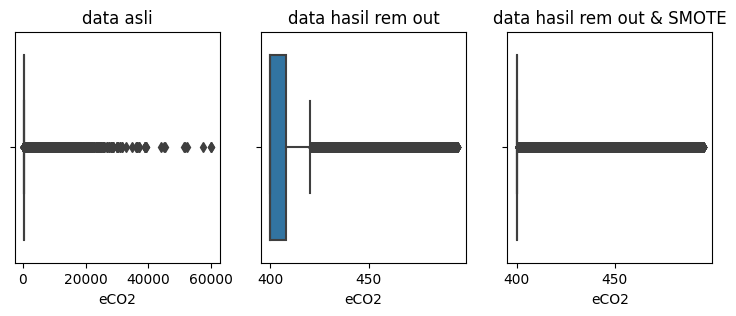

In [59]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(9,3), sharey=True)
ax[0].set_title('data asli')
ax[1].set_title('data hasil rem out')
ax[2].set_title('data hasil rem out & SMOTE')

sns.boxplot(data=train_set, x='eCO2', ax=ax[0])
sns.boxplot(data=train_set_clean, x='eCO2', ax=ax[1])
sns.boxplot(data=train_set_clean_sm, x='eCO2', ax=ax[2])
plt.show()

#### Raw_H2

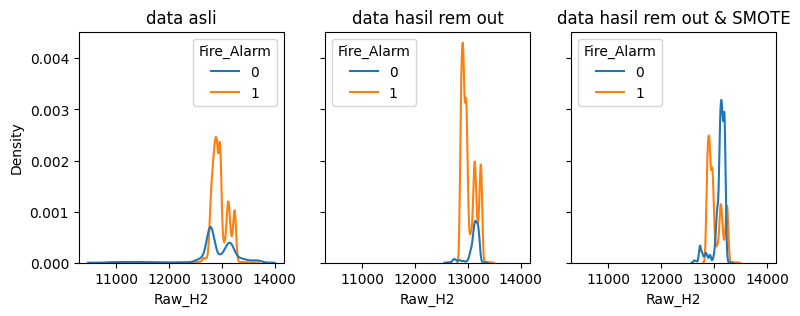

In [60]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(9,3), sharey=True, sharex=True)
ax[0].set_title('data asli')
ax[1].set_title('data hasil rem out')
ax[2].set_title('data hasil rem out & SMOTE')

sns.kdeplot(data=train_set, x='Raw_H2', hue='Fire_Alarm', ax=ax[0])
sns.kdeplot(data=train_set_clean, x='Raw_H2', hue='Fire_Alarm', ax=ax[1])
sns.kdeplot(data=train_set_clean_sm, x='Raw_H2', hue='Fire_Alarm', ax=ax[2])
plt.show()

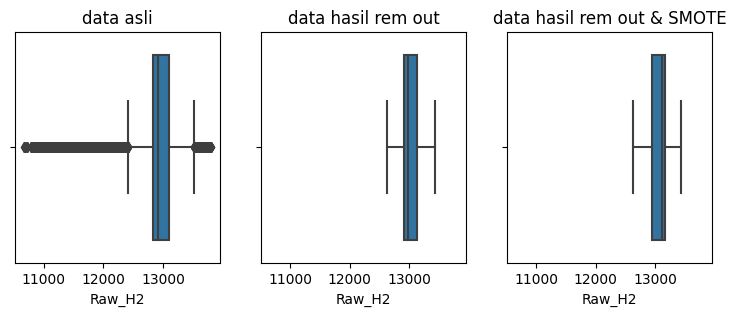

In [61]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(9,3), sharey=True, sharex=True)
ax[0].set_title('data asli')
ax[1].set_title('data hasil rem out')
ax[2].set_title('data hasil rem out & SMOTE')

sns.boxplot(data=train_set, x='Raw_H2', ax=ax[0])
sns.boxplot(data=train_set_clean, x='Raw_H2', ax=ax[1])
sns.boxplot(data=train_set_clean_sm, x='Raw_H2', ax=ax[2])
plt.show()

#### Raw_Ethanol

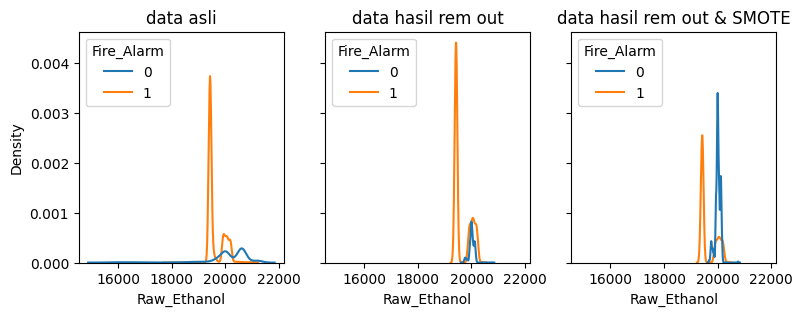

In [62]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(9,3), sharey=True, sharex=True)
ax[0].set_title('data asli')
ax[1].set_title('data hasil rem out')
ax[2].set_title('data hasil rem out & SMOTE')

sns.kdeplot(data=train_set, x='Raw_Ethanol', hue='Fire_Alarm', ax=ax[0])
sns.kdeplot(data=train_set_clean, x='Raw_Ethanol', hue='Fire_Alarm', ax=ax[1])
sns.kdeplot(data=train_set_clean_sm, x='Raw_Ethanol', hue='Fire_Alarm', ax=ax[2])
plt.show()

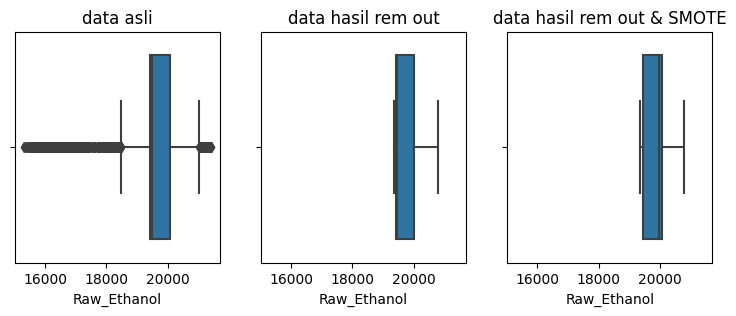

In [63]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(9,3), sharey=True, sharex=True)
ax[0].set_title('data asli')
ax[1].set_title('data hasil rem out')
ax[2].set_title('data hasil rem out & SMOTE')

sns.boxplot(data=train_set, x='Raw_Ethanol', ax=ax[0])
sns.boxplot(data=train_set_clean, x='Raw_Ethanol', ax=ax[1])
sns.boxplot(data=train_set_clean_sm, x='Raw_Ethanol', ax=ax[2])
plt.show()

#### Pressure

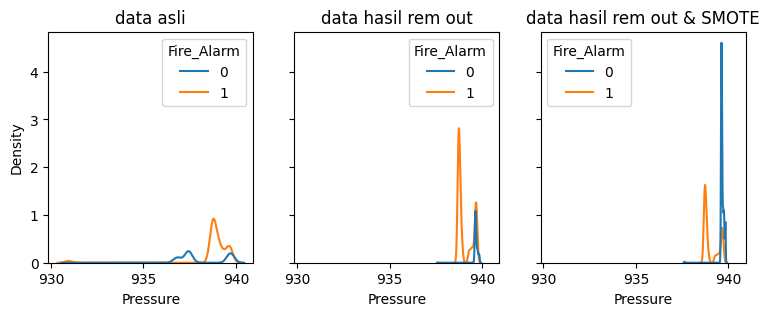

In [64]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(9,3), sharey=True, sharex=True)
ax[0].set_title('data asli')
ax[1].set_title('data hasil rem out')
ax[2].set_title('data hasil rem out & SMOTE')

sns.kdeplot(data=train_set, x='Pressure', hue='Fire_Alarm', ax=ax[0])
sns.kdeplot(data=train_set_clean, x='Pressure', hue='Fire_Alarm', ax=ax[1])
sns.kdeplot(data=train_set_clean_sm, x='Pressure', hue='Fire_Alarm', ax=ax[2])
plt.show()

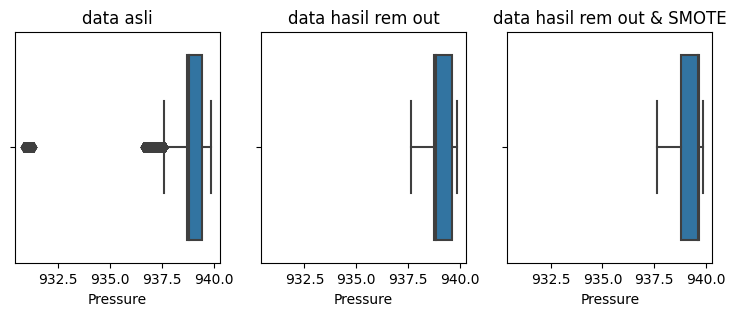

In [65]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(9,3), sharey=True, sharex=True)
ax[0].set_title('data asli')
ax[1].set_title('data hasil rem out')
ax[2].set_title('data hasil rem out & SMOTE')

sns.boxplot(data=train_set, x='Pressure', ax=ax[0])
sns.boxplot(data=train_set_clean, x='Pressure', ax=ax[1])
sns.boxplot(data=train_set_clean_sm, x='Pressure', ax=ax[2])
plt.show()

#### PM1.0

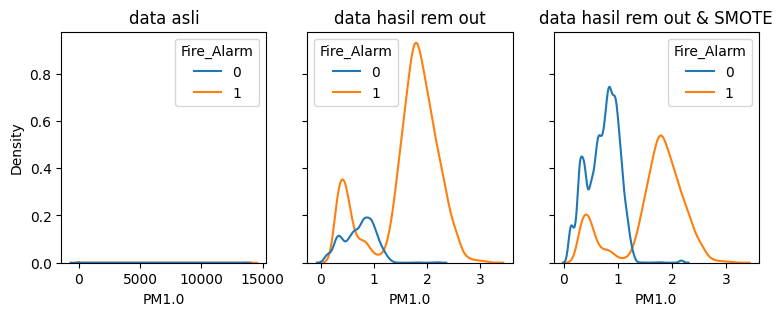

In [66]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(9,3), sharey=True)
ax[0].set_title('data asli')
ax[1].set_title('data hasil rem out')
ax[2].set_title('data hasil rem out & SMOTE')

sns.kdeplot(data=train_set, x='PM1.0', hue='Fire_Alarm', ax=ax[0])
sns.kdeplot(data=train_set_clean, x='PM1.0', hue='Fire_Alarm', ax=ax[1])
sns.kdeplot(data=train_set_clean_sm, x='PM1.0', hue='Fire_Alarm', ax=ax[2])
plt.show()

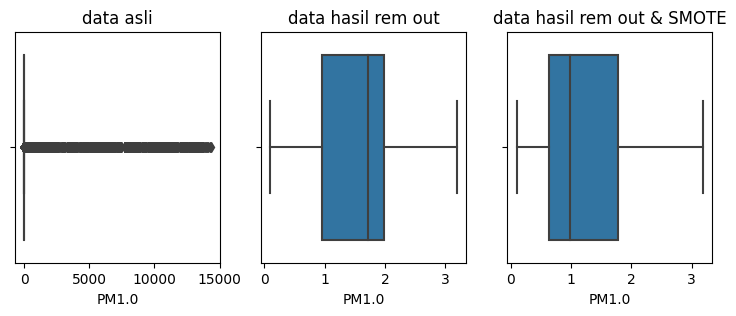

In [68]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(9,3), sharey=True)
ax[0].set_title('data asli')
ax[1].set_title('data hasil rem out')
ax[2].set_title('data hasil rem out & SMOTE')

sns.boxplot(data=train_set, x='PM1.0', ax=ax[0])
sns.boxplot(data=train_set_clean, x='PM1.0', ax=ax[1])
sns.boxplot(data=train_set_clean_sm, x='PM1.0', ax=ax[2])
plt.show()

#### PM2.5

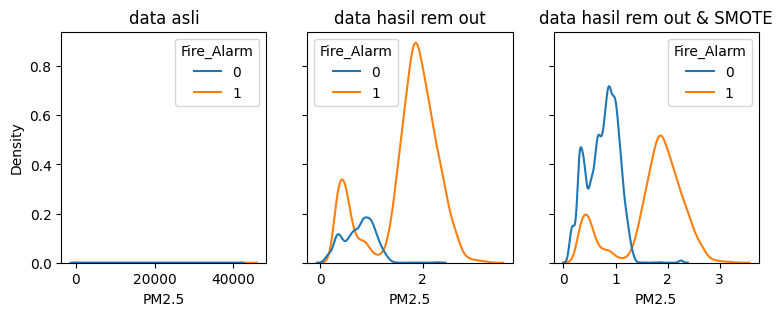

In [69]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(9,3), sharey=True)
ax[0].set_title('data asli')
ax[1].set_title('data hasil rem out')
ax[2].set_title('data hasil rem out & SMOTE')

sns.kdeplot(data=train_set, x='PM2.5', hue='Fire_Alarm', ax=ax[0])
sns.kdeplot(data=train_set_clean, x='PM2.5', hue='Fire_Alarm', ax=ax[1])
sns.kdeplot(data=train_set_clean_sm, x='PM2.5', hue='Fire_Alarm', ax=ax[2])
plt.show()

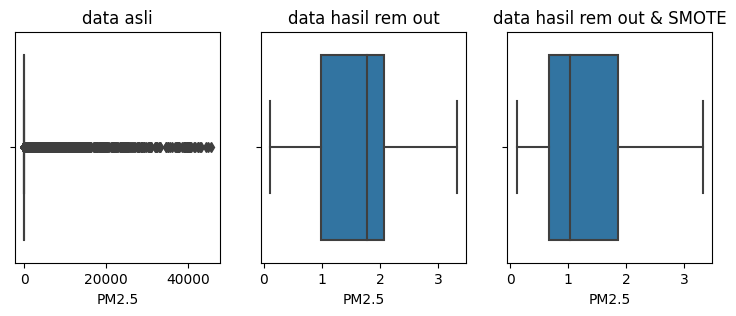

In [70]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(9,3), sharey=True)
ax[0].set_title('data asli')
ax[1].set_title('data hasil rem out')
ax[2].set_title('data hasil rem out & SMOTE')

sns.boxplot(data=train_set, x='PM2.5', ax=ax[0])
sns.boxplot(data=train_set_clean, x='PM2.5', ax=ax[1])
sns.boxplot(data=train_set_clean_sm, x='PM2.5', ax=ax[2])
plt.show()

#### NC0.5

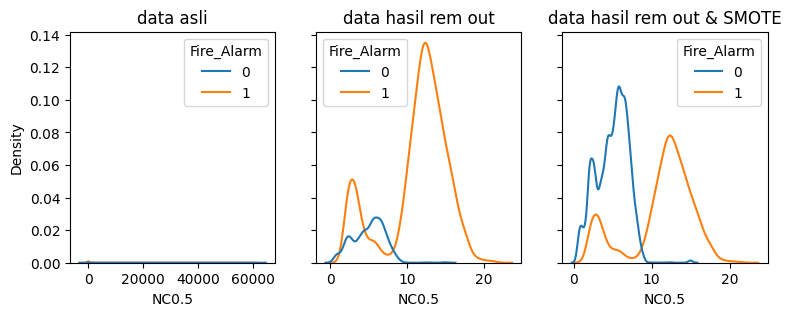

In [71]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(9,3), sharey=True)
ax[0].set_title('data asli')
ax[1].set_title('data hasil rem out')
ax[2].set_title('data hasil rem out & SMOTE')

sns.kdeplot(data=train_set, x='NC0.5', hue='Fire_Alarm', ax=ax[0])
sns.kdeplot(data=train_set_clean, x='NC0.5', hue='Fire_Alarm', ax=ax[1])
sns.kdeplot(data=train_set_clean_sm, x='NC0.5', hue='Fire_Alarm', ax=ax[2])
plt.show()

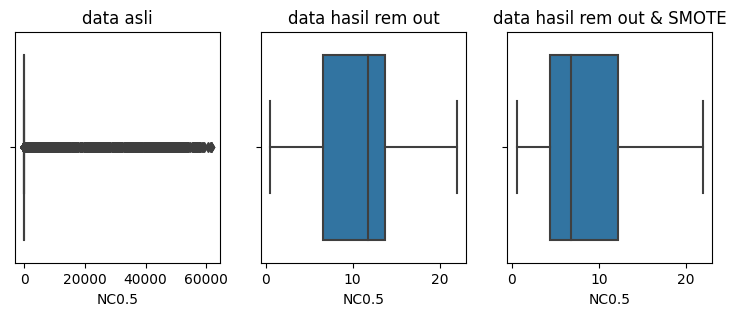

In [72]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(9,3), sharey=True)
ax[0].set_title('data asli')
ax[1].set_title('data hasil rem out')
ax[2].set_title('data hasil rem out & SMOTE')

sns.boxplot(data=train_set, x='NC0.5', ax=ax[0])
sns.boxplot(data=train_set_clean, x='NC0.5', ax=ax[1])
sns.boxplot(data=train_set_clean_sm, x='NC0.5', ax=ax[2])
plt.show()

#### NC1.0

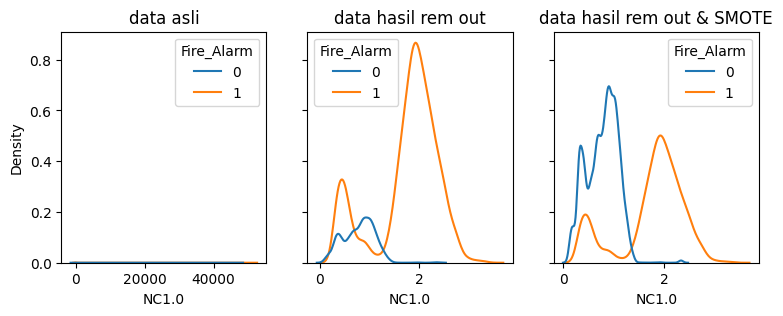

In [74]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(9,3), sharey=True)
ax[0].set_title('data asli')
ax[1].set_title('data hasil rem out')
ax[2].set_title('data hasil rem out & SMOTE')

sns.kdeplot(data=train_set, x='NC1.0', hue='Fire_Alarm', ax=ax[0])
sns.kdeplot(data=train_set_clean, x='NC1.0', hue='Fire_Alarm', ax=ax[1])
sns.kdeplot(data=train_set_clean_sm, x='NC1.0', hue='Fire_Alarm', ax=ax[2])
plt.show()

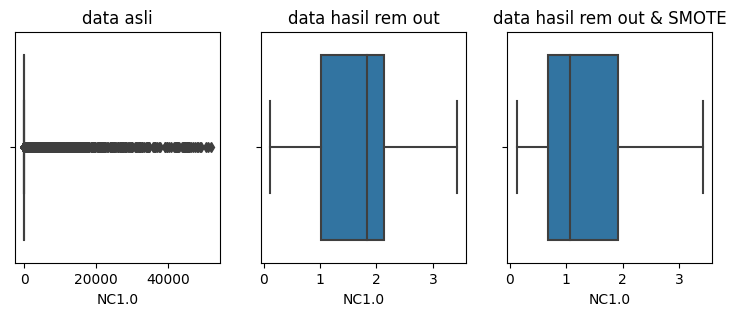

In [75]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(9,3), sharey=True)
ax[0].set_title('data asli')
ax[1].set_title('data hasil rem out')
ax[2].set_title('data hasil rem out & SMOTE')

sns.boxplot(data=train_set, x='NC1.0', ax=ax[0])
sns.boxplot(data=train_set_clean, x='NC1.0', ax=ax[1])
sns.boxplot(data=train_set_clean_sm, x='NC1.0', ax=ax[2])
plt.show()

#### NC2.5

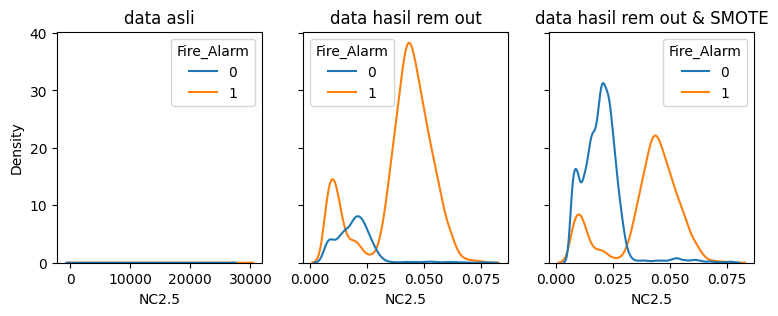

In [76]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(9,3), sharey=True)
ax[0].set_title('data asli')
ax[1].set_title('data hasil rem out')
ax[2].set_title('data hasil rem out & SMOTE')

sns.kdeplot(data=train_set, x='NC2.5', hue='Fire_Alarm', ax=ax[0])
sns.kdeplot(data=train_set_clean, x='NC2.5', hue='Fire_Alarm', ax=ax[1])
sns.kdeplot(data=train_set_clean_sm, x='NC2.5', hue='Fire_Alarm', ax=ax[2])
plt.show()

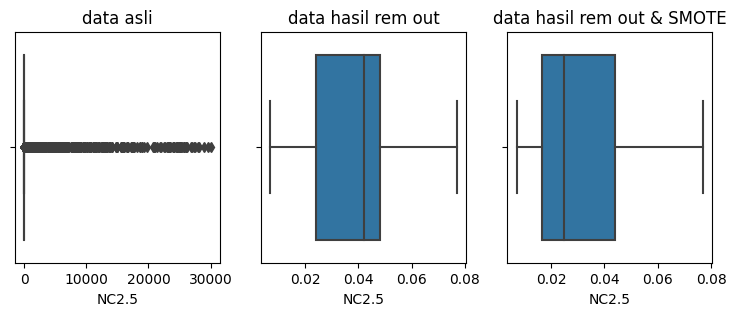

In [78]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(9,3), sharey=True)
ax[0].set_title('data asli')
ax[1].set_title('data hasil rem out')
ax[2].set_title('data hasil rem out & SMOTE')

sns.boxplot(data=train_set, x='NC2.5', ax=ax[0])
sns.boxplot(data=train_set_clean, x='NC2.5', ax=ax[1])
sns.boxplot(data=train_set_clean_sm, x='NC2.5', ax=ax[2])
plt.show()

### Correlation Spearman

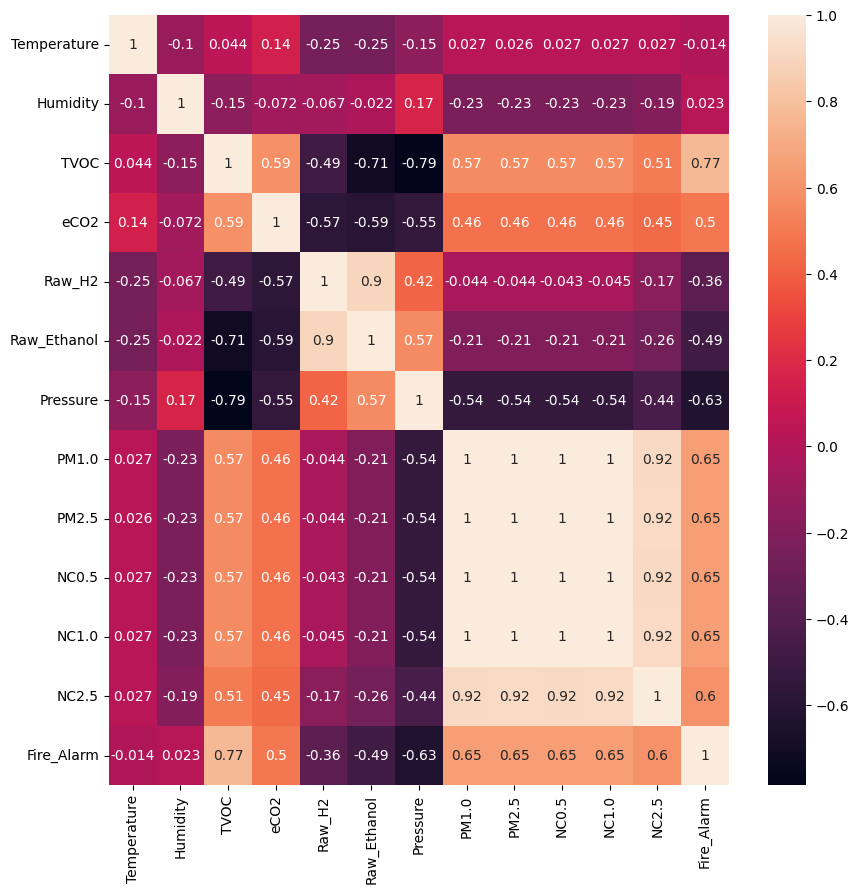

In [79]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(train_set_clean_sm.corr(method='spearman', numeric_only = True), annot=True, ax=ax)
plt.show()

> Karena PM1.0, PM2.5, NC0.5, NC1.0, dan NC2.5 mempunyai nilai corelation 0.95-1 yg artinya mempunyai korelasi hampir sempurna, sehingga bs di wakilkan oleh 1 predictor saja. maka akan di drop, di sisakan hanya 1 saja, misal PM1.0

In [80]:
def correlated(x):
    train_corr = train_set_clean_sm.corr()
    print(x.upper())
    print('------------')
    tmp = train_corr[(train_corr[x]>=0.5) | (train_corr[x]<=-0.5)][x]
    return tmp

a =  train_set_clean_sm.corr()
for col in a.columns:
    print(correlated(col))
    print()

TEMPERATURE
------------
Temperature    1.0
Name: Temperature, dtype: float64

HUMIDITY
------------
Humidity    1.0
Name: Humidity, dtype: float64

TVOC
------------
TVOC           1.000000
Raw_H2        -0.679452
Raw_Ethanol   -0.950170
Pressure      -0.972281
PM1.0          0.657671
PM2.5          0.657884
NC0.5          0.657565
NC1.0          0.657931
NC2.5          0.616376
Fire_Alarm     0.741555
Name: TVOC, dtype: float64

ECO2
------------
eCO2    1.0
Name: eCO2, dtype: float64

RAW_H2
------------
TVOC          -0.679452
Raw_H2         1.000000
Raw_Ethanol    0.845133
Pressure       0.639746
Name: Raw_H2, dtype: float64

RAW_ETHANOL
------------
TVOC          -0.950170
Raw_H2         0.845133
Raw_Ethanol    1.000000
Pressure       0.901459
NC2.5         -0.519169
Fire_Alarm    -0.610427
Name: Raw_Ethanol, dtype: float64

PRESSURE
------------
TVOC          -0.972281
Raw_H2         0.639746
Raw_Ethanol    0.901459
Pressure       1.000000
PM1.0         -0.652086
PM2.5         -

#### Remove corr yang kuat

In [81]:
new_cols = ['Temperature', 'Humidity', 'TVOC', 'eCO2', 'Raw_H2', 'Raw_Ethanol', 'Pressure', 'PM1.0', 'Fire_Alarm']
train_set_clean_sm = train_set_clean_sm[new_cols].copy()
train_set_clean_sm

,Temperature,Humidity,TVOC,eCO2,Raw_H2,Raw_Ethanol,Pressure,PM1.0,Fire_Alarm
0,27.120000,47.370000,1228,405,12909,19428,938.728000,1.660000,1
1,15.890000,54.620000,0,400,13074,19971,939.747000,0.320000,0
2,-8.792000,51.420000,50,400,13232,20165,939.684000,2.180000,1
3,18.600000,54.980000,316,400,13107,19948,939.387000,0.360000,1
4,1.903000,48.940000,156,400,13214,20069,939.655000,1.610000,1
...,...,...,...,...,...,...,...,...,...
43007,18.126802,49.244925,11,400,13115,20014,939.661107,0.600640,0
43008,15.211347,51.899346,2,400,12996,19926,939.731163,0.288245,0
43009,26.569841,56.330484,0,400,13097,19998,939.720397,0.622540,0
43010,19.402662,52.310000,9,400,13216,20160,939.610000,1.170000,0


### Pairplot

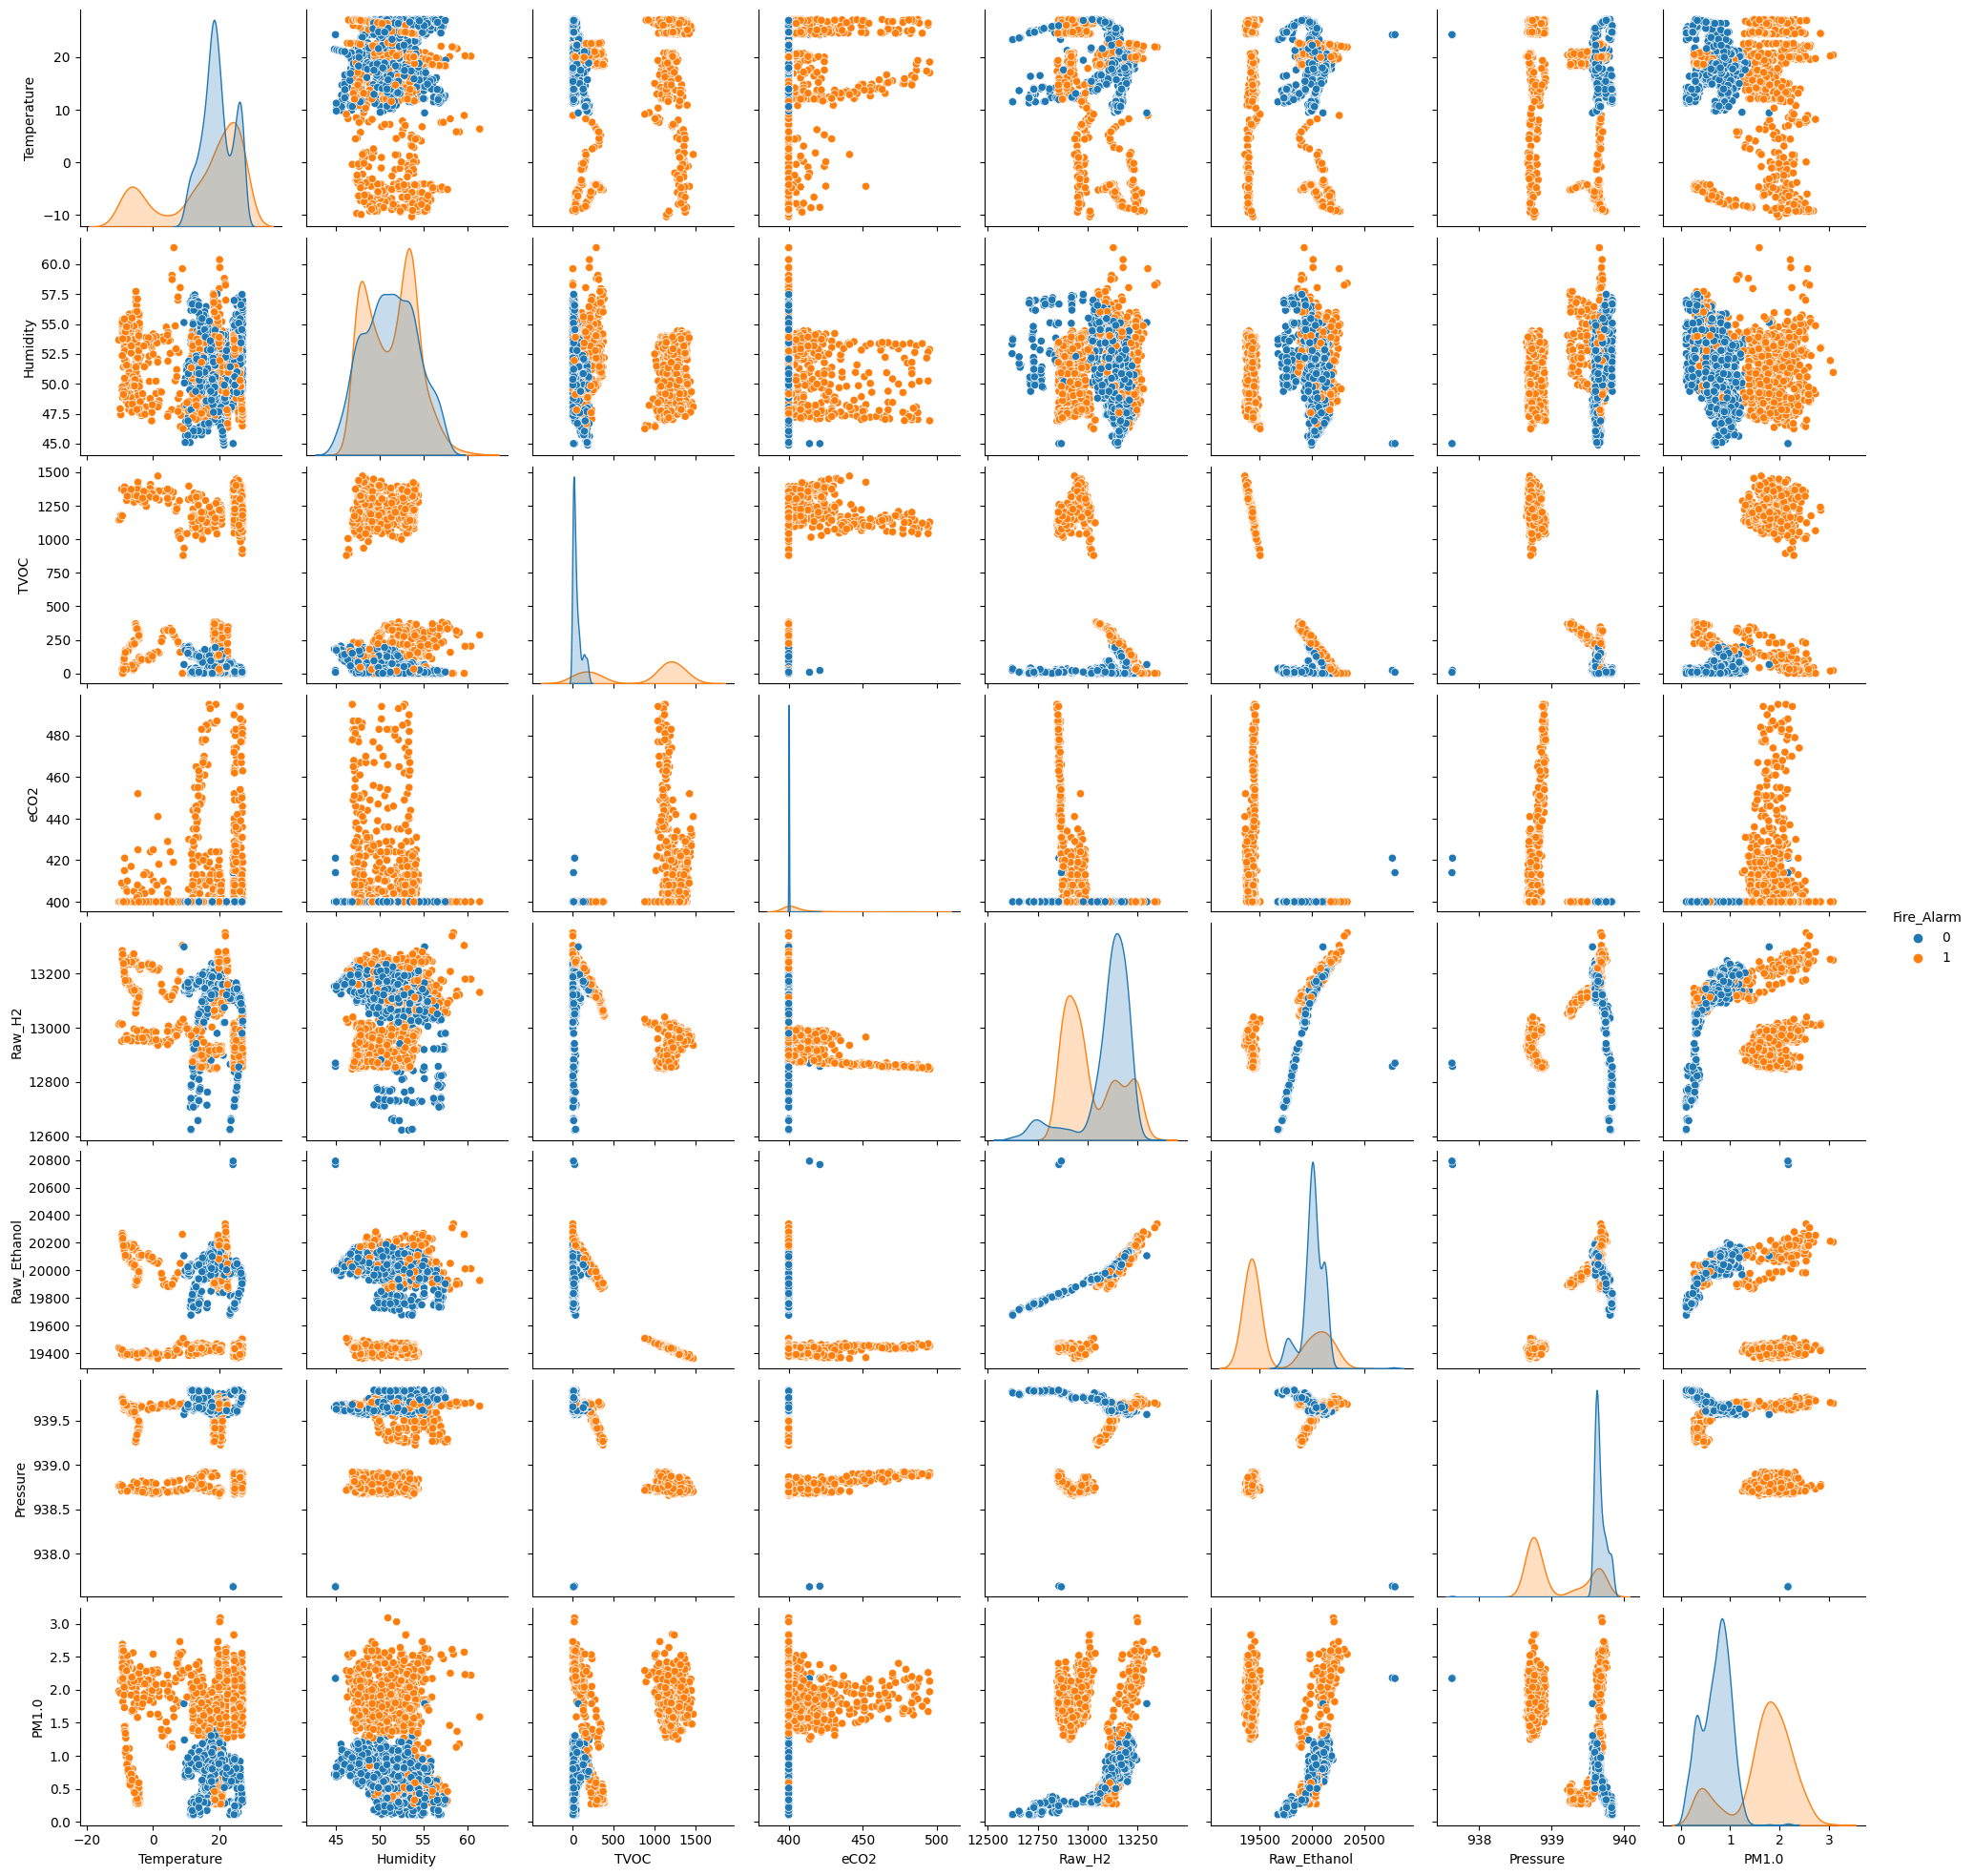

In [82]:
sns.pairplot(train_set_clean_sm.sample(2000), hue=target)
plt.show()

In [83]:
train_set_clean_sm.describe()

,Temperature,Humidity,TVOC,eCO2,Raw_H2,Raw_Ethanol,Pressure,PM1.0,Fire_Alarm
count,43012.000000,43012.000000,43012.000000,43012.000000,43012.000000,43012.000000,43012.000000,43012.000000,43012.000000
mean,17.412674,51.180581,445.891263,404.748582,13060.146773,19833.352948,939.359203,1.184725,0.500000
std,9.147209,2.919829,534.418130,14.219722,132.202866,292.925289,0.426407,0.659586,0.500006
min,-10.490000,41.350000,0.000000,400.000000,12622.000000,19358.000000,937.624000,0.100000,0.000000
25%,14.790560,48.670000,25.000000,400.000000,12940.750000,19446.000000,938.804000,0.639722,0.000000
50%,19.328804,51.220000,131.000000,400.000000,13105.000000,19976.000000,939.614544,0.992176,0.500000
75%,24.520000,53.430000,1134.000000,400.000000,13163.000000,20053.000000,939.662000,1.780000,1.000000
max,28.910000,61.650000,1490.000000,495.000000,13438.000000,20795.000000,939.856000,3.190000,1.000000


In [84]:
x_train = train_set_clean_sm.drop(target, axis=1)
y_train = train_set_clean_sm[target].copy()

In [85]:
joblib.dump(x_train, '../data/processed/x_train.pkl')
joblib.dump(y_train, '../data/processed/y_train.pkl')
joblib.dump(x_valid, '../data/processed/x_valid.pkl')
joblib.dump(y_valid, '../data/processed/y_valid.pkl')
joblib.dump(x_test, '../data/processed/x_test.pkl')
joblib.dump(y_test, '../data/processed/y_test.pkl')

['../data/processed/y_test.pkl']

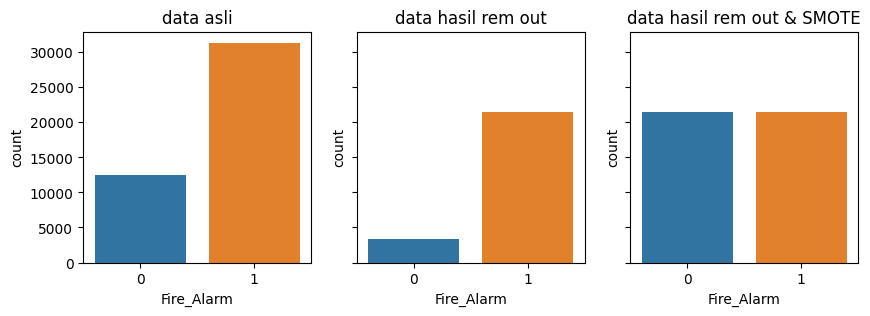

In [86]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10,3), sharey=True)
ax[0].set_title('data asli')
ax[1].set_title('data hasil rem out')
ax[2].set_title('data hasil rem out & SMOTE')

sns.countplot(data=train_set, x=target, ax=ax[0])
sns.countplot(data=train_set_clean, x=target, ax=ax[1])
sns.countplot(data=train_set_clean_sm, x=target, ax=ax[2])
plt.show()

In [87]:
print(train_set.shape)
print(train_set_clean.shape)
print(train_set_clean_sm.shape)

(43841, 13)
(24882, 13)
(43012, 9)


> Dari hasil EDA terlihat bahwa ada beberapa kolom yg korelasinya sangat kuat, sehingga bisa di wakilkan oleh 1 variable saja

> banyak data outlier, sehingga perlu di remove terlebih dahulu

> data target, imbalance, solusi di SMOTE

> Data ready utk proses modelling